In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
plt.style.use('seaborn-whitegrid')
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [96]:
df = pd.read_csv('OnlineNewsPopularity.csv')

#print(data.columns)
# cols = ['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_unique_tokens','num_hrefs','num_self_hrefs',
#         'num_imgs','videos','average_token_length','num_keywords','kw_avg_min','kw_avg_max','self_reference_avg_sharess',
#         'global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
#         'avg_positive_polarity','avg_negative_polarity','shares']

In [97]:
df.columns = df.columns.str.replace(' ', '')

In [98]:
def oneHot(data, col):
    data = pd.concat([data,pd.get_dummies(data[col])],axis=1)
    return data

In [99]:
### TARGET
df['target'] = np.where(df['shares']>=1400, 1, 0)

In [100]:
print(df[['shares','target']])
print("Liczba wiecej lub rownych 1400: ", df['target'].sum())
print("Liczba mniej niż 1400: ", df.shape[0]-df['target'].sum())

       shares  target
0         593       0
1         711       0
2        1500       1
3        1200       0
4         505       0
...       ...     ...
39639    1800       1
39640    1900       1
39641    1900       1
39642    1100       0
39643    1300       0

[39644 rows x 2 columns]
Liczba wiecej lub rownych 1400:  21154
Liczba mniej niż 1400:  18490


In [101]:
conditions = [
    (df['weekday_is_monday'] == 1),
    (df['weekday_is_tuesday'] == 1),
    (df['weekday_is_wednesday'] == 1),
    (df['weekday_is_thursday'] == 1),
    (df['weekday_is_friday'] == 1),
    (df['weekday_is_saturday'] == 1),
    (df['weekday_is_sunday'] == 1)]
choices = ["Monday", "Tuesday", 'Wednesday','Thursday','Friday','Saturday','Sunday']
df['weekday'] = np.select(conditions, choices)
print(df['weekday'])

0           Monday
1           Monday
2           Monday
3           Monday
4           Monday
           ...    
39639    Wednesday
39640    Wednesday
39641    Wednesday
39642    Wednesday
39643    Wednesday
Name: weekday, Length: 39644, dtype: object


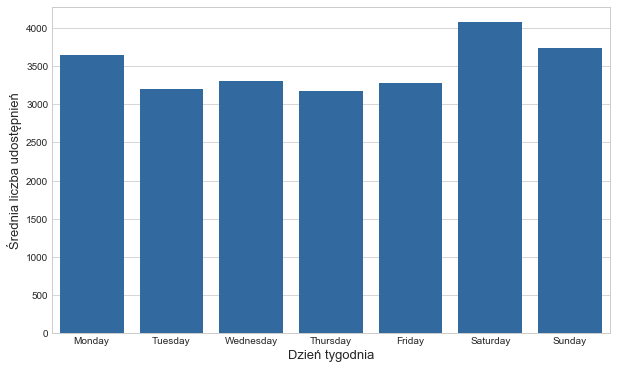

In [102]:
shares_mean_weekday = df.groupby('weekday')['shares'].mean().reset_index()
#print(shares_mean_weekday)

plt.figure(figsize=(10,6))
sns.barplot(x = 'weekday', y = 'shares', data = shares_mean_weekday, linewidth = 1,color=(32/255,107/255,178/255),order = ["Monday", "Tuesday", 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel("Dzień tygodnia",fontsize=13)
plt.ylabel("Średnia liczba udostępnień",fontsize=13)
plt.show()

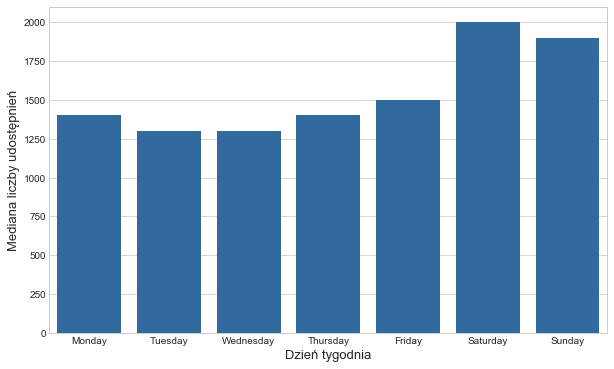

In [103]:
shares_median_weekday = df.groupby('weekday')['shares'].median().reset_index()
#print(shares_median_weekday)

plt.figure(figsize=(10,6))
sns.barplot(x = 'weekday', y = 'shares', data = shares_median_weekday, linewidth = 1,color=(32/255,107/255,178/255),order = ["Monday", "Tuesday", 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel("Dzień tygodnia",fontsize=13)
plt.ylabel("Mediana liczby udostępnień",fontsize=13)
plt.show()

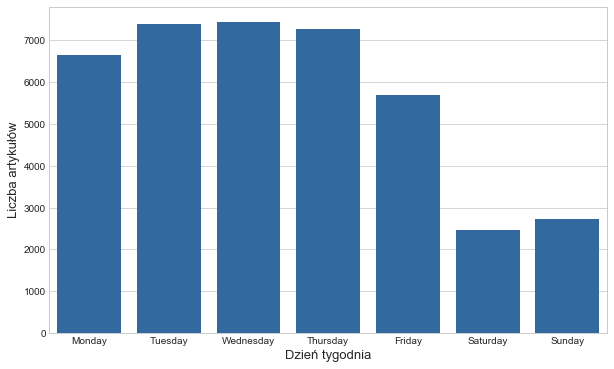

In [104]:
shares_count_weekday = df.groupby('weekday')['shares'].count().reset_index()
#print(shares_count_weekday)

plt.figure(figsize=(10,6))
sns.barplot(x = 'weekday', y = 'shares', data = shares_count_weekday, linewidth = 1,color=(32/255,107/255,178/255),order = ["Monday", "Tuesday", 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel("Dzień tygodnia",fontsize=13)
plt.ylabel("Liczba artykułów",fontsize=13)
plt.show()

In [105]:
Wd = df.columns.values[31:38]
Wd

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

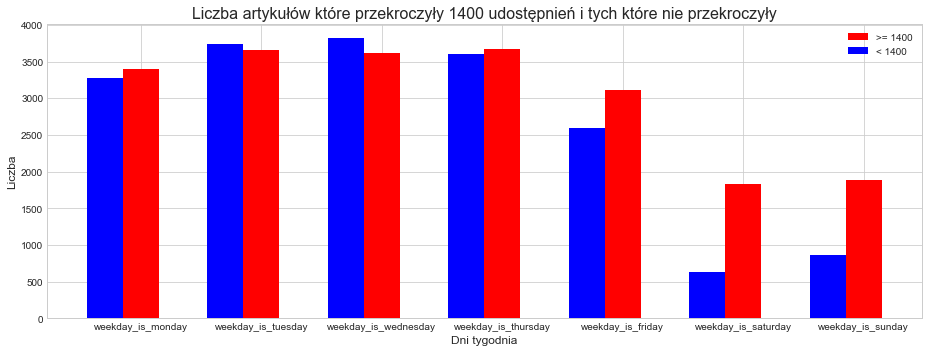

In [106]:
Unpop=df[df['shares']<1400]
Pop=df[df['shares']>=1400]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Liczba artykułów które przekroczyły 1400 udostępnień i tych które nie przekroczyły", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = ">= 1400")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "< 1400")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Liczba", fontsize = 12)
plt.xlabel("Dni tygodnia", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [107]:
means = []
means.append(df.groupby('target')['LDA_00'].mean())
means.append(df.groupby('target')['LDA_01'].mean())
means.append(df.groupby('target')['LDA_02'].mean())
means.append(df.groupby('target')['LDA_03'].mean())
means.append(df.groupby('target')['LDA_04'].mean())

In [108]:
means

[target
 0    0.165682
 1    0.201133
 Name: LDA_00, dtype: float64,
 target
 0    0.159791
 1    0.125055
 Name: LDA_01, dtype: float64,
 target
 0    0.264575
 1    0.174144
 Name: LDA_02, dtype: float64,
 target
 0    0.205269
 1    0.239940
 Name: LDA_03, dtype: float64,
 target
 0    0.204683
 1    0.259680
 Name: LDA_04, dtype: float64]

In [109]:
df.groupby('target').count().iloc[:,0]

target
0    18490
1    21154
Name: url, dtype: int64

In [110]:
##################################################

# diff max min positive polarity

##################################################
df['diff_max_min_positive_polarity'] = df['max_positive_polarity'] - df['min_positive_polarity']

In [111]:
df['diff_max_min_positive_polarity']

0        0.600000
1        0.666667
2        0.900000
3        0.663636
4        0.966667
           ...   
39639    0.650000
39640    0.563636
39641    0.363636
39642    0.437500
39643    0.400000
Name: diff_max_min_positive_polarity, Length: 39644, dtype: float64

In [112]:
##################################################

# diff max min negative polarity

##################################################
df['diff_max_min_negative_polarity'] = df['max_negative_polarity'] - df['min_negative_polarity']

In [113]:
df['diff_max_min_negative_polarity']

0        0.400000
1        0.025000
2        0.666667
3        0.433333
4        0.450000
           ...   
39639    0.375000
39640    0.300000
39641    0.633333
39642    0.487500
39643    0.000000
Name: diff_max_min_negative_polarity, Length: 39644, dtype: float64

In [114]:
over = 1
conditions = [
    (df['num_imgs']+df['num_videos'] > over),
    (df['num_imgs']+df['num_videos'] <= over)]
choices = [1,0]
df['mult_over'] = np.select(conditions, choices)

In [115]:
print(df.groupby('mult_over')['target'].count())
print(df.groupby('mult_over')['shares'].mean())
print(df.groupby('mult_over')['shares'].median())

mult_over
0    18504
1    21140
Name: target, dtype: int64
mult_over
0    2793.446444
1    3922.257285
Name: shares, dtype: float64
mult_over
0    1300
1    1500
Name: shares, dtype: int64


(array([  41.,   93.,  736., 1802., 2635., 1754., 1998., 1588., 1157.,
         950.,  779.,  642.,  542.,  481.,  379.,  371.,  302.,  286.,
         251.,  239.,  187.,  180.,  175.,  149.,  149.,  134.,  116.,
         137.,  113.,  109.,   96.,  103.,   93.,   72.,   72.,   54.,
          58.,   72.,   80.,   67.,   52.,   53.,   51.,   35.,   41.,
          49.,   44.,   39.,   34.,   54.]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.,  2200.,  2400.,  2600.,  2800.,  3000.,
         3200.,  3400.,  3600.,  3800.,  4000.,  4200.,  4400.,  4600.,
         4800.,  5000.,  5200.,  5400.,  5600.,  5800.,  6000.,  6200.,
         6400.,  6600.,  6800.,  7000.,  7200.,  7400.,  7600.,  7800.,
         8000.,  8200.,  8400.,  8600.,  8800.,  9000.,  9200.,  9400.,
         9600.,  9800., 10000.]),
 <a list of 50 Patch objects>)

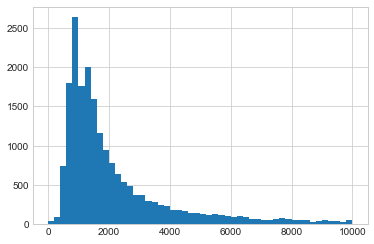

In [116]:
plt.hist(df.loc[df['mult_over']==1]['shares'],bins=50,range=(0,10000))

(array([ 124.,  202.,  996., 2114., 2504., 1731., 1760., 1327.,  993.,
         749.,  656.,  500.,  405.,  396.,  336.,  283.,  239.,  237.,
         205.,  201.,  140.,  146.,  119.,  127.,  108.,   87.,  101.,
          64.,   68.,   60.,   66.,   60.,   81.,   53.,   54.,   29.,
          43.,   33.,   32.,   48.,   28.,   27.,   24.,   36.,   21.,
          34.,   30.,   23.,   26.,   39.]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.,  2200.,  2400.,  2600.,  2800.,  3000.,
         3200.,  3400.,  3600.,  3800.,  4000.,  4200.,  4400.,  4600.,
         4800.,  5000.,  5200.,  5400.,  5600.,  5800.,  6000.,  6200.,
         6400.,  6600.,  6800.,  7000.,  7200.,  7400.,  7600.,  7800.,
         8000.,  8200.,  8400.,  8600.,  8800.,  9000.,  9200.,  9400.,
         9600.,  9800., 10000.]),
 <a list of 50 Patch objects>)

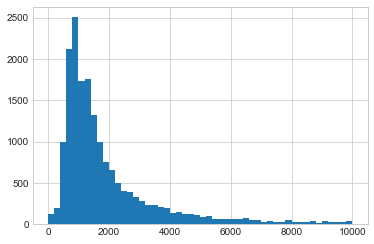

In [117]:
plt.hist(df.loc[df['mult_over']==0]['shares'],bins=50,range=(0,10000))

In [118]:
df.groupby('mult_over')['shares'].mean()

mult_over
0    2793.446444
1    3922.257285
Name: shares, dtype: float64

In [119]:
conditions = [
    ((df['weekday'].str.lower() == 'monday') | (df['weekday'].str.lower() == 'friday')),
    ((df['weekday'].str.lower() == 'tuesday') | (df['weekday'].str.lower() == 'wednesday') | (df['weekday'].str.lower() == 'thursday'))]
choices = ["weekday_is_mon_fri", "weekday_is_tue_wed_thu"]
df['weekday_cat'] = np.select(conditions, choices)
df['weekday_cat'] = df['weekday_cat'].replace({'0':"is_weekend"})

In [120]:
conditions = [
    (df['data_channel_is_lifestyle'] == 1),
    (df['data_channel_is_entertainment'] == 1),
    (df['data_channel_is_bus'] == 1),
    (df['data_channel_is_socmed'] == 1),
    (df['data_channel_is_tech'] == 1),
    (df['data_channel_is_world'] == 1),
    (df['data_channel_is_world']+df['data_channel_is_tech']+df['data_channel_is_socmed']+df['data_channel_is_bus']+df['data_channel_is_bus']+df['data_channel_is_entertainment']+df['data_channel_is_lifestyle']==0)]
choices = ["Lifestyle", "Entertainment", 'Bus','Socmed','Tech','World','Other']
df['data_channel'] = np.select(conditions, choices)
print(df['data_channel'])

0        Entertainment
1                  Bus
2                  Bus
3        Entertainment
4                 Tech
             ...      
39639             Tech
39640           Socmed
39641            Other
39642            World
39643    Entertainment
Name: data_channel, Length: 39644, dtype: object


In [121]:
df = oneHot(df, 'data_channel')

    data_channel       shares
0            Bus  3063.018536
1  Entertainment  2970.487034
2      Lifestyle  3682.123392
3          Other  5945.189599
4         Socmed  3629.383125
5           Tech  3072.283283
6          World  2287.734069


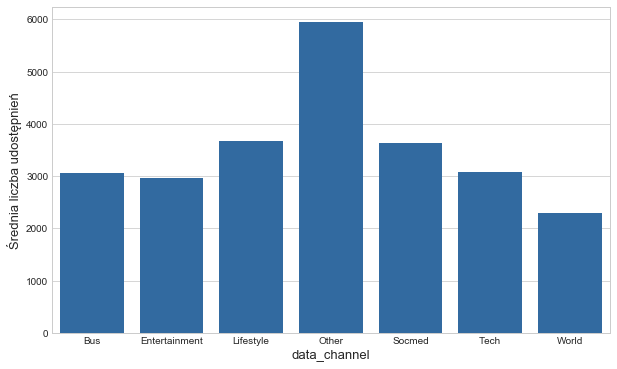

In [122]:
shares_mean_data_channel = df.groupby('data_channel')['shares'].mean().reset_index()
print(shares_mean_data_channel)

plt.figure(figsize=(10,6))
sns.barplot(x = 'data_channel', y = 'shares', data = shares_mean_data_channel, linewidth = 1,color=(32/255,107/255,178/255))
plt.xlabel("data_channel",fontsize=13)
plt.ylabel("Średnia liczba udostępnień",fontsize=13)
plt.show()

    data_channel  shares
0            Bus    1400
1  Entertainment    1200
2      Lifestyle    1700
3          Other    1900
4         Socmed    2100
5           Tech    1700
6          World    1100


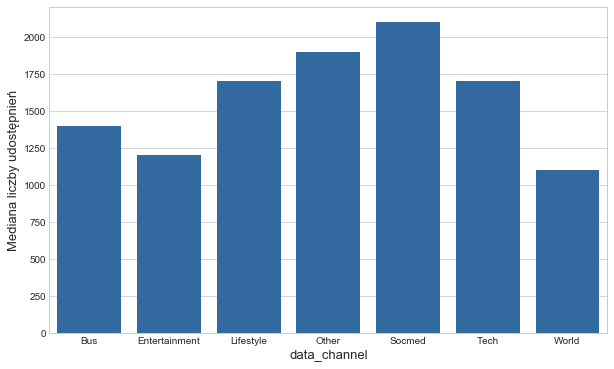

In [123]:
shares_median_data_channel = df.groupby('data_channel')['shares'].median().reset_index()
print(shares_median_data_channel)

plt.figure(figsize=(10,6))
sns.barplot(x = 'data_channel', y = 'shares', data = shares_median_data_channel, linewidth = 1,color=(32/255,107/255,178/255))
plt.xlabel("data_channel",fontsize=13)
plt.ylabel("Mediana liczby udostępnień",fontsize=13)
plt.show()

    data_channel  shares
0            Bus    6258
1  Entertainment    7057
2      Lifestyle    2099
3          Other    6134
4         Socmed    2323
5           Tech    7346
6          World    8427


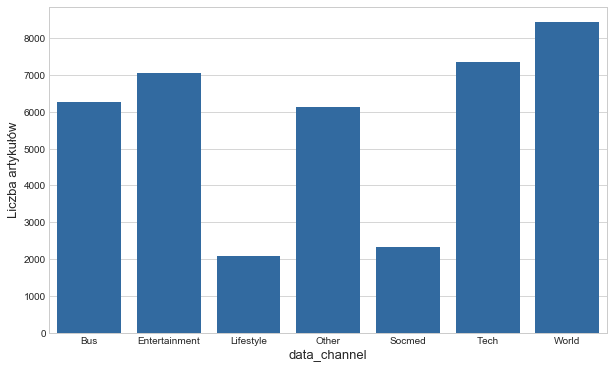

In [124]:
shares_count_data_channel = df.groupby('data_channel')['shares'].count().reset_index()
print(shares_count_data_channel)

plt.figure(figsize=(10,6))
sns.barplot(x = 'data_channel', y = 'shares', data = shares_count_data_channel, linewidth = 1,color=(32/255,107/255,178/255))
plt.xlabel("data_channel",fontsize=13)
plt.ylabel("Liczba artykułów",fontsize=13)
plt.show()

Text(0, 0.5, 'Liczba artykułów')

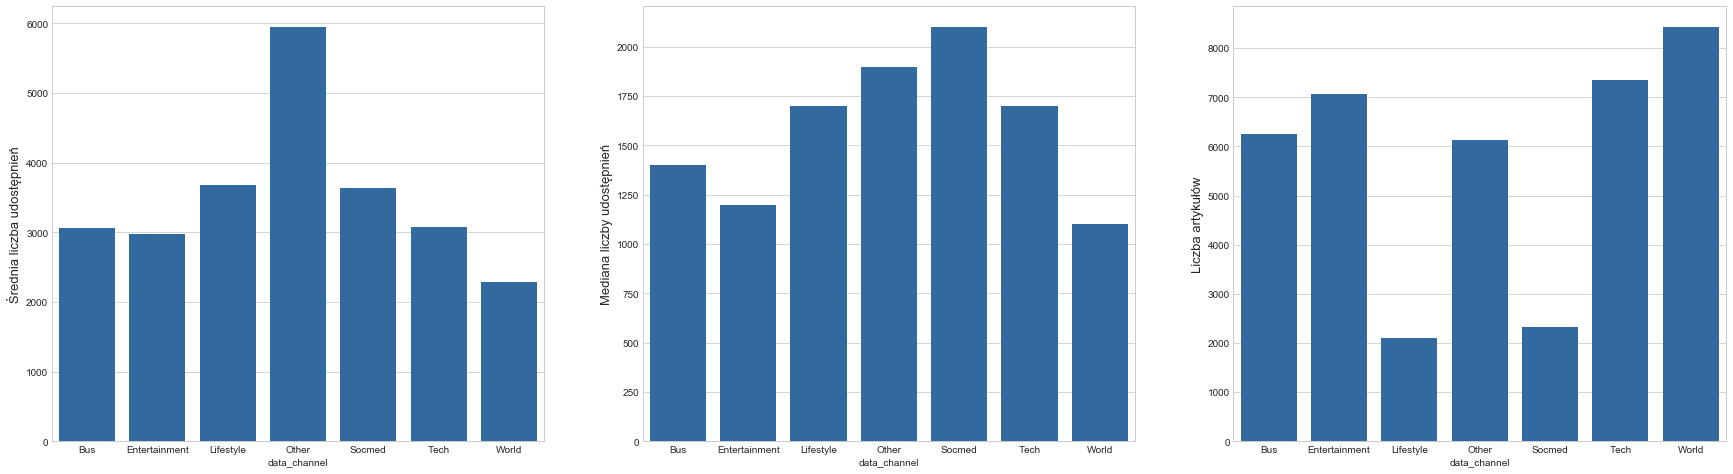

In [125]:
fig,axs = plt.subplots(1,3,figsize=(30,8), squeeze=False)

sns.barplot(x = 'data_channel', y = 'shares', data = shares_mean_data_channel, linewidth = 1,color=(32/255,107/255,178/255),ax = axs[0][0])
axs[0][0].set_ylabel("Średnia liczba udostępnień",fontsize=13)
sns.barplot(x = 'data_channel', y = 'shares', data = shares_median_data_channel, linewidth = 1,color=(32/255,107/255,178/255),ax = axs[0][1])
axs[0][1].set_ylabel("Mediana liczby udostępnień",fontsize=13)
sns.barplot(x = 'data_channel', y = 'shares', data = shares_count_data_channel, linewidth = 1,color=(32/255,107/255,178/255),ax = axs[0][2])
axs[0][2].set_ylabel("Liczba artykułów",fontsize=13)
# axs[0].barplot(x = 'data_channel', y = 'shares', data = shares_mean_data_channel, linewidth = 1,color=(32/255,107/255,178/255))
# axs[0].set_xlabel('Odległość manhattan [km]',fontsize=13)
# axs[0].set_ylabel('Kwota za przejazd [$]',fontsize=13)

# axs[1].scatter(delta['odleglosc_euklidesowa'],delta['fare_amount'],color=(32/255,107/255,178/255),linewidth=0.1)
# axs[1].set_xlabel('Odległość euklidesowa [km]',fontsize=13)
# axs[1].set_ylabel('Kwota za przejazd [$]',fontsize=13)

In [139]:
df.columns[68:75]

Index(['Bus', 'Entertainment', 'Lifestyle', 'Other', 'Socmed', 'Tech',
       'World'],
      dtype='object')

In [140]:
dc = df.columns.values[68:75]

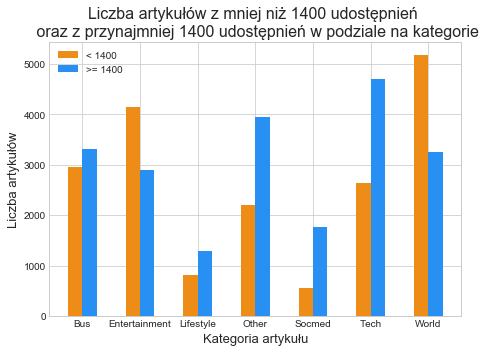

In [141]:
niepopularne = df[df['shares']<1400]
popularne = df[df['shares']>=1400]

ile_niepopularnych = niepopularne[dc].sum()
ile_popularnych = popularne[dc].sum()

fig = plt.figure(figsize = (7,5))
plt.title("Liczba artykułów z mniej niż 1400 udostępnień \n oraz z przynajmniej 1400 udostępnień w podziale na kategorie", fontsize = 16)
plt.bar(np.arange(len(dc)) - 0.125, ile_niepopularnych, width = 0.25, align = "center", color = (237/255, 141/255, 24/255), label = "< 1400")
plt.bar(np.arange(len(dc)) + 0.125, ile_popularnych, width = 0.25, align="center", color = (39/255, 144/255, 242/255), label = ">= 1400")

plt.xticks(np.arange(len(dc)), dc)
plt.ylabel("Liczba artykułów", fontsize = 13)
plt.xlabel("Kategoria artykułu", fontsize = 13)
    
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("dc_pop_unpop.png")
plt.show()

In [36]:
conditions = [
    ((df['data_channel'].str.lower() == 'world') | (df['data_channel'].str.lower() == 'entertainment')),
    ((df['data_channel'].str.lower() == 'lifestyle') | (df['data_channel'].str.lower() == 'socmed')),
    ((df['data_channel'].str.lower() == 'bus') | (df['data_channel'].str.lower() == 'tech')),
    ((df['data_channel'].str.lower() is not 'world') & (df['data_channel'].str.lower() is not 'entertainment') & (df['data_channel'].str.lower() is not 'tech') & (df['data_channel'].str.lower() is not 'socmed') & (df['data_channel'].str.lower() is not 'lifestyle') & (df['data_channel'].str.lower() is not 'bus'))]
choices = ["dc_is_world_enter","dc_is_lifestyle_socmed","dc_is_tech_bus","dc_is_other"]
df['dc_cat'] = np.select(conditions, choices)

In [37]:
df = oneHot(df, 'dc_cat')

In [38]:
df['tok_content_tok_title'] = df['n_tokens_content'] / df['n_tokens_title']

In [39]:
df['tok_content_tok_title']

0         18.250000
1         28.333333
2         23.444444
3         59.000000
4         82.461538
            ...    
39639     31.454545
39640     27.333333
39641     44.200000
39642    113.666667
39643     15.700000
Name: tok_content_tok_title, Length: 39644, dtype: float64

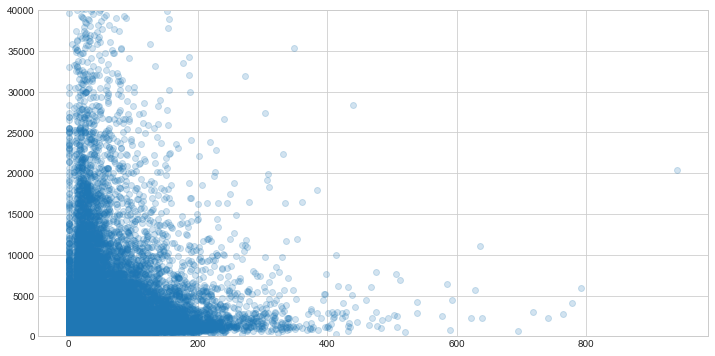

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(x = df["tok_content_tok_title"], y = df["shares"],alpha = 0.2)
plt.ylim(0, 40000)
plt.show()

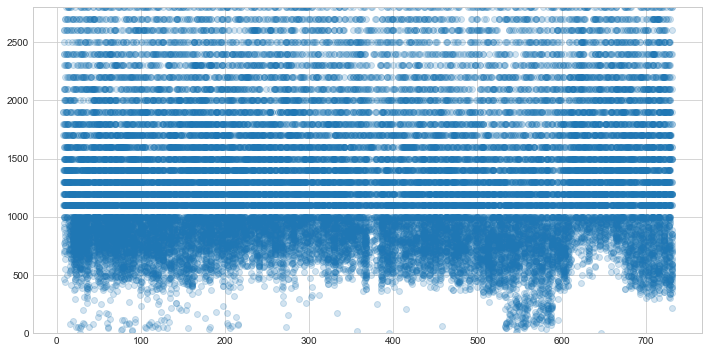

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(x = df["timedelta"], y = df["shares"],alpha = 0.2)
plt.ylim(0, 2800)
plt.show()

In [42]:
df.groupby('timedelta')['shares'].count().head(20)

timedelta
8.0      8
9.0     57
10.0    62
11.0    25
12.0    20
13.0    41
14.0    42
15.0    50
16.0    61
17.0    71
18.0    25
19.0    27
20.0    73
21.0    66
22.0    87
23.0    93
24.0    70
25.0    28
26.0    27
27.0    60
Name: shares, dtype: int64

In [43]:
df.groupby('timedelta')['shares'].mean().head(10)

timedelta
8.0     1537.500000
9.0     2622.789474
10.0    2737.129032
11.0    3520.000000
12.0    5454.350000
13.0    1835.487805
14.0    2253.238095
15.0    2630.340000
16.0    3395.524590
17.0    2515.478873
Name: shares, dtype: float64

In [44]:
df['n_art_in_day'] = df['shares'].groupby(df['timedelta']).transform('count')
print(df['n_art_in_day'])

0        79
1        79
2        79
3        79
4        79
         ..
39639     8
39640     8
39641     8
39642     8
39643     8
Name: n_art_in_day, Length: 39644, dtype: int64


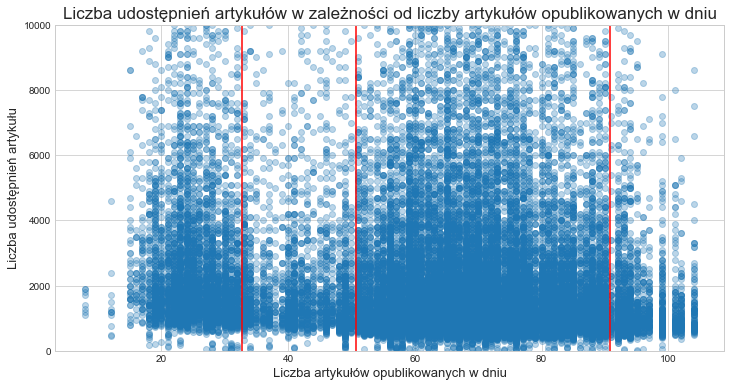

In [91]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['n_art_in_day'], df["shares"],alpha=0.3)

line = mlines.Line2D([0.28, 0.28], [1,0], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

line = mlines.Line2D([0.45, 0.45], [1,0], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

line = mlines.Line2D([0.83, 0.83], [1,0], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

ax.set_title("Liczba udostępnień artykułów w zależności od liczby artykułów opublikowanych w dniu",fontsize=17)
ax.set_ylabel("Liczba udostępnień artykułu",fontsize=13)
ax.set_xlabel("Liczba artykułów opublikowanych w dniu",fontsize=13)
ax.set_ylim(0, 10000)
plt.savefig("shares_n_art_day.png")
plt.show()

In [54]:
conditions = [
    (df['n_art_in_day'] < 32),
    ((df['n_art_in_day'] >= 32) & (df['n_art_in_day'] < 51)),
    ((df['n_art_in_day'] >= 51) & (df['n_art_in_day'] < 90)),
    (df['n_art_in_day'] >= 91)]
choices = ["n_art_in_day_under_32","n_art_in_day_between_32_51","n_art_in_day_between_51_90","n_art_in_day_over_90"]
df['n_art_in_day_over_under'] = np.select(conditions, choices)

In [56]:
df = oneHot(df,'n_art_in_day_over_under')

In [58]:
df['n_art_in_day_between_32_51']

0        0
1        0
2        0
3        0
4        0
        ..
39639    0
39640    0
39641    0
39642    0
39643    0
Name: n_art_in_day_between_32_51, Length: 39644, dtype: uint8

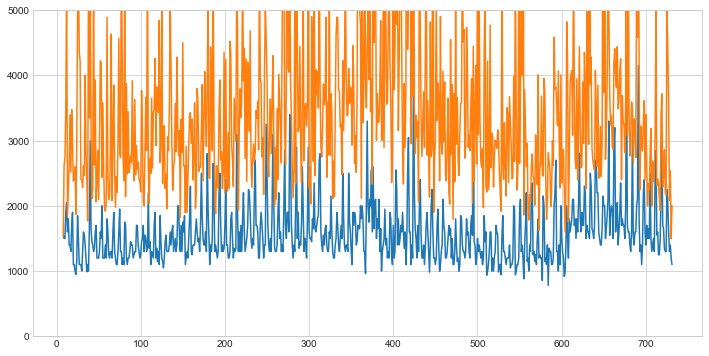

In [117]:
plt.figure(figsize=(12,6))
plt.plot(df.groupby('timedelta')['shares'].median())
plt.plot(df.groupby('timedelta')['shares'].mean())
plt.ylim(0, 5000)
plt.show()